# Exploratory data analysis
## Group project
### 42180 Quantitative modelling of behaviour

------

**Group 11** <br>

------

Camille Babin <br>
Martine Grangé <br>
Mikkel Johansen <br>
Kyriakos Michailidis <br>
Jiri Spitzer

------

Import libraries and enable inline plotting

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
from collections import Counter
from re import search as Search
from IPython.display import display

In [2]:
%matplotlib inline

Disable warnings

In [3]:
warnings.filterwarnings('ignore')

Load data

In [4]:
data_path = r'.\data\Elisa_thesis_data_noPC.csv'

In [5]:
df = pd.read_csv(data_path)
df.head(2)

,VAR1,ID,CHOICE,Alt_Description_ICV1,CarClass_ICV1,CarType_ICV1,Purchaseprice_ICV1,Operationcost_ICV1,Yearlycost__ICV1,Range_ICV1,...,q16_20_resp,q16_21_resp,q16_22_resp,q16_23_resp,q16_24_resp,House_single,House_couple,House_children,House_couple_children,House_couple_nochildren
0,0,1,1,1,2,1,200000,1.11,4300,1097,...,1,5,4,2,5,1,0,0,0,0
1,1,1,3,1,2,1,185000,0.88,4300,898,...,1,5,4,2,5,1,0,0,0,0


#### Explore data

Size of the dataset

In [6]:
print("Row count:     ", df.shape[0]) 
print("Column count:  ", df.shape[1])

Row count:      23688
Column count:   428


In [7]:
sorted(df.CHOICE.unique())

[0, 1, 2, 3, 4, 5, 6]

In [14]:
sorted(df.CHOICE18.unique())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]

In [8]:
ic_p = round(df[df.CHOICE == 0].VAR1.count() * 100. / df.ID.count(),2)
ic_p18 = round(df[df.CHOICE18 == 0].VAR1.count() * 100. / df.ID.count(),2)
print('Invalid choice:    ',df[df.CHOICE == 0].VAR1.count(),f'({ic_p}%)')
print('Invalid choice 18: ',df[df.CHOICE18 == 0].VAR1.count(),f'({ic_p18}%)')

Invalid choice:     14 (0.06%)
Invalid choice 18:  14 (0.06%)


Check for missing values

In [9]:
stat = []
for col in df.columns: 
    a = list(zip(Counter(df[col].isnull()).keys(), Counter(df[col].isnull()).values()))
    try:
        if (a[0][0] == True):
            stat.append([col, a[0][1]])
        elif (a[1][0] == True):
            stat.append([col, a[1][1]])
    except:
        stat.append([col, 0])
df_stat = pd.DataFrame(stat).rename(columns={0:'Column name',1:'N/A count'})
df_stat = df_stat.sort_values(by=["N/A count"], ascending=False)
df_stat["N/A %"] = round(df_stat["N/A count"] / len(df) * 100,2)
df_stat.head(5)

,Column name,N/A count,N/A %
0,VAR1,0,0.0
294,q2a_2_carClass,0,0.0
292,q2,0,0.0
291,q1,0,0.0
290,c_Geogrp,0,0.0


Slect specific columns

In [10]:
col = df.columns.to_list()

pattern = [
    "Purchaseprice_", "cost_", "cost_", "CO2_", "Charging",
    "Range", "Acceleration", "Home", "Size", "CarClass","CarType"
]
col_s = []
for c in col:
    for p in pattern:
        if Search(p,c):
            col_s.append(c)
            break
            
#print(col_s)
#print(len(col_s))

In [11]:
df2 = df.copy(deep=True)
df2 = df2[col_s]

In [12]:
# pd.options.display.max_columns = None

Display choices

In [18]:
df.groupby('CHOICE')['CHOICE'].count()

CHOICE
0      14
1    6694
2    3257
3    6804
4    3125
5    2656
6    1138
Name: CHOICE, dtype: int64

In [19]:
col = df2.columns.to_list()
cat = ["CarClass","CarType"]
col_s = []
for c in col:
    for x in cat:
        if Search(x,c):
            col_s.append(c)
#col_s

['CarClass_ICV1',
 'CarType_ICV1',
 'CarClass_ICV2',
 'CarType_ICV2',
 'CarClass_BEV1',
 'CarType_BEV1',
 'CarClass_BEV2',
 'CarType_BEV2',
 'CarClass_PHEV1',
 'CarType_PHEV1',
 'CarClass_PHEV2',
 'CarType_PHEV2']

In [20]:
col_s2 = [x for x in col_s]
col_s2.insert(0,"CHOICE")
col_s2.insert(1,"CHOICE18")
#col_s2

['CHOICE',
 'CHOICE18',
 'CarClass_ICV1',
 'CarType_ICV1',
 'CarClass_ICV2',
 'CarType_ICV2',
 'CarClass_BEV1',
 'CarType_BEV1',
 'CarClass_BEV2',
 'CarType_BEV2',
 'CarClass_PHEV1',
 'CarType_PHEV1',
 'CarClass_PHEV2',
 'CarType_PHEV2']

In [21]:
df[col_s2]

,CHOICE,CHOICE18,CarClass_ICV1,CarType_ICV1,CarClass_ICV2,CarType_ICV2,CarClass_BEV1,CarType_BEV1,CarClass_BEV2,CarType_BEV2,CarClass_PHEV1,CarType_PHEV1,CarClass_PHEV2,CarType_PHEV2
0,1,2,2,1,4,1,2,2,4,2,0,0,0,0
1,3,8,2,1,4,1,2,2,4,2,0,0,0,0
2,1,2,2,1,4,1,2,2,4,2,0,0,0,0
3,1,2,2,1,4,1,2,2,4,2,0,0,0,0
4,5,14,2,1,4,1,2,2,4,2,2,3,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23683,4,9,2,1,3,1,2,2,3,2,0,0,0,0
23684,4,9,2,1,3,1,2,2,3,2,2,3,3,3
23685,4,9,2,1,3,1,2,2,3,2,2,3,3,3
23686,4,9,2,1,3,1,2,2,3,2,2,3,3,3


In [22]:
for c in col_s:
    print(c,sorted(df2[c].unique()))

CarClass_ICV1 [0, 1, 2, 3, 4, 5, 6]
CarType_ICV1 [0, 1]
CarClass_ICV2 [0, 1, 2, 3, 4, 5, 6]
CarType_ICV2 [0, 1]
CarClass_BEV1 [0, 1, 2, 3, 4, 5, 6]
CarType_BEV1 [0, 2]
CarClass_BEV2 [0, 1, 2, 3, 4, 5, 6]
CarType_BEV2 [0, 2]
CarClass_PHEV1 [0, 1, 2, 3, 4, 5, 6]
CarType_PHEV1 [0, 3]
CarClass_PHEV2 [0, 1, 2, 3, 4, 5, 6]
CarType_PHEV2 [0, 3]


In [23]:
choice = [x for x in range(0,7)]
choice_cnt = df.groupby('CHOICE')['CHOICE'].count().to_list()
choice_prc = [round(x * 100. / sum(choice_cnt),4) for x in choice_cnt]

choice_stat = pd.DataFrame(
    {
        "choice": choice,
        "count": choice_cnt,
        "ratio": choice_prc
    }
)

choice_stat.sort_values(by=['count'], ascending=False)

,choice,count,ratio
3,3,6804,28.7234
1,1,6694,28.2590
2,2,3257,13.7496
4,4,3125,13.1923
5,5,2656,11.2124
6,6,1138,4.8041
0,0,14,0.0591


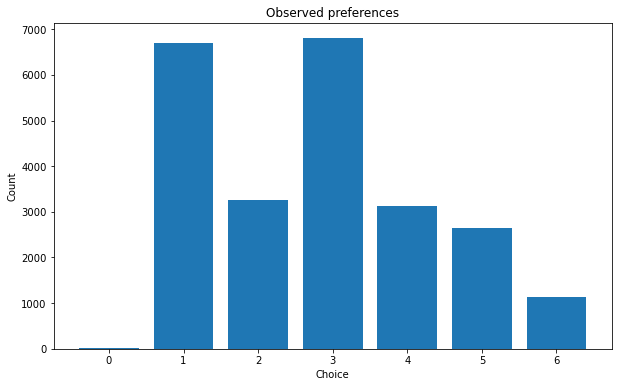

In [24]:
plt.figure(figsize=(10, 6))
plt.bar(choice_stat["choice"].to_list(),choice_stat["count"].to_list())
plt.title('Observed preferences')
plt.xlabel('Choice')
plt.ylabel('Count')
#plt.grid(True)
# plt.show()
plt.savefig(r'C:\Users\Jirka\Desktop\choices.png')

Demographic data

In [25]:
df4 = df.copy(deep=True)
check_sum =len(df4)

In [26]:
print("Min. age:",df4.c_Age.min())
print("Max. age:",df4.c_Age.max())

Min. age: 18
Max. age: 90


In [27]:
df4 = df4.drop_duplicates(subset=["ID"])

Check sum

In [28]:
int(check_sum / 4) == int(len(df4))

False

In [29]:
df4['c_Age'].sort_values().unique()

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 90], dtype=int64)

In [30]:
df4['age_group'] = -1
df4['age_group'] = np.where(df4['c_Age'] <= 30,1,df4['age_group'])
df4['age_group'] = np.where((df4['c_Age'] > 30) & (df4['c_Age'] <= 40),2,df4['age_group'])
df4['age_group'] = np.where((df4['c_Age'] > 40) & (df4['c_Age'] <= 55),3,df4['age_group'])
df4['age_group'] = np.where((df4['c_Age'] > 55) & (df4['c_Age'] <= 75),4,df4['age_group'])
df4['age_group'] = np.where(df4['c_Age'] > 75,5,df4['age_group'])

In [31]:
print("Check age_group:",df4[df4['age_group'] == -1]['ID'].count())

Check age_group: 0


In [32]:
age_group = [x for x in range(1,6)]
age_cnt = df4.groupby('age_group')['age_group'].count().to_list()
age_prc = [round(x * 100. / sum(age_cnt),4) for x in age_cnt]

age_stat = pd.DataFrame(
    {
        "age_group": age_group,
        "count": age_cnt,
        "ratio": age_prc
    }
)

age_stat.sort_values(by=['count'], ascending=False)

,age_group,count,ratio
2,3,974,32.8943
3,4,964,32.5566
1,2,465,15.7042
0,1,449,15.1638
4,5,109,3.6812


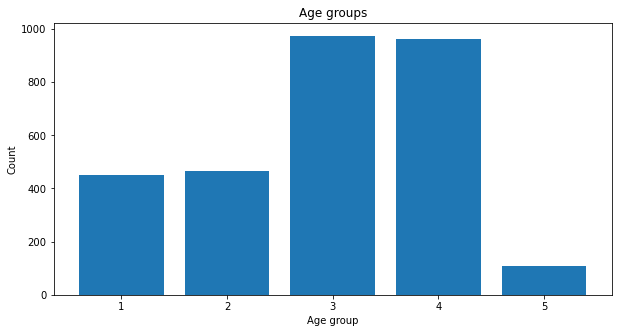

In [33]:
plt.figure(figsize=(10, 5))
plt.bar(age_stat["age_group"].to_list(),age_stat["count"].to_list())
plt.title('Age groups')
plt.xlabel('Age group')
plt.ylabel('Count')
#plt.grid(True)
#plt.show()
plt.savefig(r'C:\Users\Jirka\Desktop\age_groups.png')

In [34]:
#df4.groupby('c_Gender')['c_Gender'].count().plot(kind='pie', y='Gender');

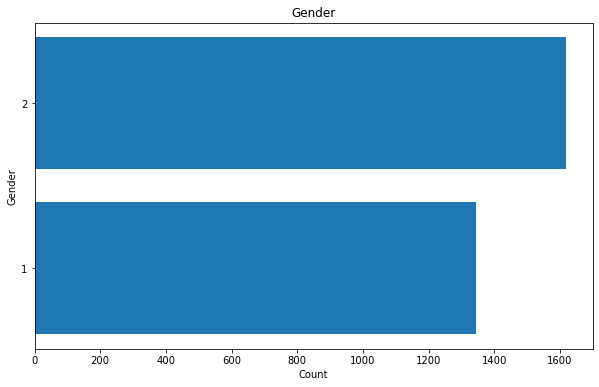

In [35]:
plt.figure(figsize=(10, 6))
plt.barh([1,2],df4.groupby('c_Gender')['c_Gender'].count().to_list())
plt.title('Gender')
plt.xlabel('Count')
plt.ylabel('Gender')
plt.yticks([1,2])
#plt.show()
plt.savefig(r'C:\Users\Jirka\Desktop\gender.png')

In [18]:
df_mod=df[df['CHOICE']>0].copy(deep=True)
df_mod.reset_index();

In [19]:
n,m=df_mod.shape

In [20]:
av_cho=[]
for i in df_mod.index:
    av_cho.append([])
    if df_mod['CarClass_ICV1'].loc[i]>0: 
        av_cho[-1].append(df_mod['CarClass_ICV1'].loc[i])
    if df_mod['CarClass_ICV2'].loc[i]>0:
        av_cho[-1].append(df_mod['CarClass_ICV2'].loc[i])
    if df_mod['CarClass_BEV1'].loc[i]>0:
        av_cho[-1].append(df_mod['CarClass_BEV1'].loc[i]+6)
    if df_mod['CarClass_BEV2'].loc[i]>0:
        av_cho[-1].append(df_mod['CarClass_BEV2'].loc[i]+6)
    if df_mod['CarClass_PHEV1'].loc[i]>0: 
        av_cho[-1].append(df_mod['CarClass_PHEV1'].loc[i]+12)
    if df_mod['CarClass_PHEV2'].loc[i]>0:

        av_cho[-1].append(df_mod['CarClass_PHEV2'].loc[i]+12)

In [21]:
avail=[f'AV{x}' for x in range(1,19)]
for i in range(18):
    df_mod[avail[i]]=np.zeros(n,int)
    for j in range(n):
        if i+1 in av_cho[j]:
            df_mod[avail[i]].loc[df_mod.index[j]]=1

In [22]:
pd.options.display.max_columns = 30

In [23]:
cols = ['CHOICE','CHOICE18']
cols += avail
df_ch = df_mod[cols].copy(deep=True)
df_ch.head(2)

,CHOICE,CHOICE18,AV1,AV2,AV3,AV4,AV5,AV6,AV7,AV8,AV9,AV10,AV11,AV12,AV13,AV14,AV15,AV16,AV17,AV18
0,1,2,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0
1,3,8,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0


In [24]:
pd.DataFrame(df_ch[avail].sum()).transpose()

,AV1,AV2,AV3,AV4,AV5,AV6,AV7,AV8,AV9,AV10,AV11,AV12,AV13,AV14,AV15,AV16,AV17,AV18
0,5660,9784,13910,10586,4824,2584,5660,9784,13910,10586,4824,2584,2832,4892,6953,5293,2412,1292


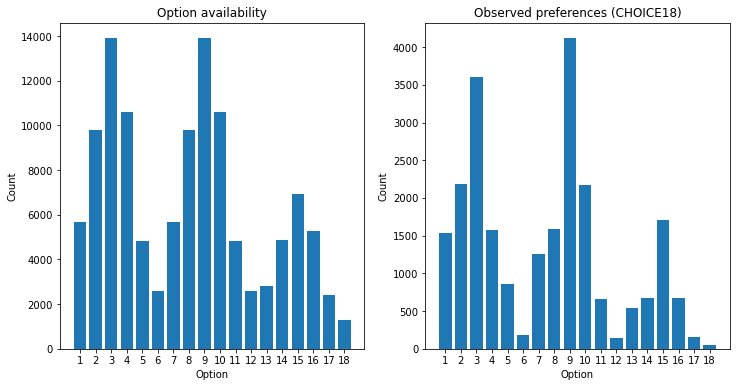

In [25]:
options = [x for x in range(1,19)]

fig, (sp1,sp2) = plt.subplots(1, 2,figsize=(12,6))

plt.setp((sp1,sp2),xticks=options) #, xticklabels=['a', 'b', 'c']

sp1.bar(options,df_ch[avail].sum().to_list())
sp1.set(xlabel='Option', ylabel='Count', title='Option availability')

sp2.bar(options,df_ch.groupby('CHOICE18')['CHOICE18'].count().to_list())
sp2.set(xlabel='Option', ylabel='Count', title='Observed preferences (CHOICE18)')

fig.savefig(r'C:\Users\Jirka\Desktop\choices18.png')

In [26]:
df_ch2 = pd.DataFrame(df_ch.groupby('CHOICE18')['CHOICE18'].count())
df_ch2.rename(columns={"CHOICE18":"Count"},inplace=True)
df_ch2 = df_ch2.reset_index()
df_ch2['Ratio'] = round(df_ch2['Count'] / df_ch2['Count'].sum() * 100,2)
df_ch2 = df_ch2.set_index('CHOICE18')
df_ch2 = df_ch2.transpose()
df_ch2

CHOICE18,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
Count,1538.0,2184.00,3604.00,1574.00,864.00,187.00,1254.0,1583.00,4118.00,2177.0,660.00,137.00,543.00,670.00,1713.00,670.00,150.00,48.0
Ratio,6.5,9.23,15.22,6.65,3.65,0.79,5.3,6.69,17.39,9.2,2.79,0.58,2.29,2.83,7.24,2.83,0.63,0.2


Basic descriptive statistics

In [38]:
col = df_mod.columns.to_list()
car_type = ["ICV_","BEV_","PHEV_"]
segment = ["MIN","LIL","MEL","STO","PRE","LUK"]

col_s = []
for i,ct in enumerate(car_type):
    for j,s in enumerate(segment):
        x = ct+s
        av = f"AV{i*6+j+1}"
        for c in col:
            if Search(x,c):
                col_s.append(c)
        display(df_mod[df_mod[av] == 1][col_s].describe().T)
        col_s.clear()

,count,mean,std,min,25%,50%,75%,max
Purchaseprice_ICV_MINI,5660.0,112456.713781,22880.577641,84000.00,100000.00,100000.00,145000.000,145000.00
Operationcost_ICV_MINI,5660.0,0.959435,0.112348,0.81,0.81,1.01,1.035,1.11
Yearlycost__ICV_MINI,5660.0,4100.641343,482.647867,3458.00,3458.00,3891.00,4323.000,4755.00
Range_ICV_MINI,5660.0,824.776855,60.136452,735.00,735.00,812.00,855.000,898.00
Acceleration_ICV_MINI,5660.0,12.967845,2.250843,10.00,10.00,12.00,16.000,16.00
Size_ICV_MINI,5660.0,2.000000,0.000000,2.00,2.00,2.00,2.000,2.00
CO2_ICV_MINI,5660.0,103.935512,21.940503,70.00,100.00,115.00,115.000,130.00
Charginginfrastructure_ICV_MINI,5660.0,0.000000,0.000000,0.00,0.00,0.00,0.000,0.00
Chargingspeed_ICV_MINI,5660.0,0.000000,0.000000,0.00,0.00,0.00,0.000,0.00
Homedistnearestcharger_ICV_MINI,5660.0,0.000000,0.000000,0.00,0.00,0.00,0.000,0.00


,count,mean,std,min,25%,50%,75%,max
Purchaseprice_ICV_LIL,9784.0,174925.899428,19072.646554,150000.00,150000.00,165000.00,200000.00,200000.00
Operationcost_ICV_LIL,9784.0,1.049682,0.126739,0.88,0.99,1.11,1.11,1.22
Yearlycost__ICV_LIL,9784.0,5096.881848,599.317956,4300.00,4300.00,4837.00,5375.00,5912.00
Range_ICV_LIL,9784.0,931.872036,133.163587,735.00,898.00,997.00,997.00,1097.00
Acceleration_ICV_LIL,9784.0,12.990188,2.231585,10.00,10.00,12.00,14.00,16.00
Size_ICV_LIL,9784.0,2.497036,0.500017,2.00,2.00,2.00,3.00,3.00
CO2_ICV_LIL,9784.0,124.111815,26.977114,84.00,84.00,120.00,156.00,156.00
Charginginfrastructure_ICV_LIL,9784.0,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00
Chargingspeed_ICV_LIL,9784.0,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00
Homedistnearestcharger_ICV_LIL,9784.0,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00


,count,mean,std,min,25%,50%,75%,max
Purchaseprice_ICV_MEL,13910.0,268014.018692,42802.792347,210000.00,210000.00,287500.00,287500.00,325000.0
Operationcost_ICV_MEL,13910.0,1.126401,0.130685,0.95,0.95,1.07,1.19,1.3
Yearlycost__ICV_MEL,13910.0,5682.205679,668.386332,4783.00,5381.00,5978.00,6576.00,6576.0
Range_ICV_MEL,13910.0,931.271459,133.440467,735.00,735.00,898.00,997.00,1097.0
Acceleration_ICV_MEL,13910.0,12.983896,2.238533,10.00,10.00,12.00,14.00,16.0
Size_ICV_MEL,13910.0,4.002804,0.708346,3.00,4.00,4.00,5.00,5.0
CO2_ICV_MEL,13910.0,135.591733,28.760264,91.00,130.00,150.00,169.00,169.0
Charginginfrastructure_ICV_MEL,13910.0,0.000000,0.000000,0.00,0.00,0.00,0.00,0.0
Chargingspeed_ICV_MEL,13910.0,0.000000,0.000000,0.00,0.00,0.00,0.00,0.0
Homedistnearestcharger_ICV_MEL,13910.0,0.000000,0.000000,0.00,0.00,0.00,0.00,0.0


,count,mean,std,min,25%,50%,75%,max
Purchaseprice_ICV_STOR,10586.0,437043.264689,56117.878318,350000.0,350000.00,430000.00,470000.00,500000.00
Operationcost_ICV_STOR,10586.0,1.186247,0.139074,1.0,1.12,1.25,1.37,1.37
Yearlycost__ICV_STOR,10586.0,8631.050727,1015.632234,7267.0,7267.00,9083.00,9083.00,9992.00
Range_ICV_STOR,10586.0,932.861988,133.903666,735.0,898.00,997.00,1097.00,1097.00
Acceleration_ICV_STOR,10586.0,11.002834,2.232282,8.0,10.00,12.00,12.00,14.00
Size_ICV_STOR,10586.0,4.500189,0.500024,4.0,4.00,5.00,5.00,5.00
CO2_ICV_STOR,10586.0,145.060552,30.970476,98.0,98.00,140.00,161.00,182.00
Charginginfrastructure_ICV_STOR,10586.0,0.000000,0.000000,0.0,0.00,0.00,0.00,0.00
Chargingspeed_ICV_STOR,10586.0,0.000000,0.000000,0.0,0.00,0.00,0.00,0.00
Homedistnearestcharger_ICV_STOR,10586.0,0.000000,0.000000,0.0,0.00,0.00,0.00,0.00


,count,mean,std,min,25%,50%,75%,max
Purchaseprice_ICV_PREM,4824.0,558817.371476,32862.054069,510000.00,550000.00,575000.0,575000.00,600000.00
Operationcost_ICV_PREM,4824.0,1.237156,0.145271,1.04,1.17,1.3,1.43,1.43
Yearlycost__ICV_PREM,4824.0,12078.296434,1426.801913,10166.00,10166.00,12708.0,13979.00,13979.00
Range_ICV_PREM,4824.0,930.083126,133.632790,735.00,735.00,898.0,997.00,1097.00
Acceleration_ICV_PREM,4824.0,9.061774,2.243963,6.00,8.00,10.0,12.00,12.00
Size_ICV_PREM,4824.0,5.000000,0.000000,5.00,5.00,5.0,5.00,5.00
CO2_ICV_PREM,4824.0,145.067164,30.989896,98.00,98.00,140.0,161.00,182.00
Charginginfrastructure_ICV_PREM,4824.0,0.000000,0.000000,0.00,0.00,0.0,0.00,0.00
Chargingspeed_ICV_PREM,4824.0,0.000000,0.000000,0.00,0.00,0.0,0.00,0.00
Homedistnearestcharger_ICV_PREM,4824.0,0.000000,0.000000,0.00,0.00,0.0,0.00,0.00


,count,mean,std,min,25%,50%,75%,max
Purchaseprice_ICV_LUK,2584.0,1.297601e+06,223290.706004,1000000.0,1000000.0,1200000.00,1.400000e+06,1600000.00
Operationcost_ICV_LUK,2584.0,1.667430e+00,0.198581,1.4,1.4,1.76,1.802500e+00,1.93
Yearlycost__ICV_LUK,2584.0,1.197259e+04,1407.585568,10114.0,10114.0,11379.00,1.264300e+04,13907.00
Range_ICV_LUK,2584.0,9.349005e+02,134.586948,735.0,898.0,997.00,1.097000e+03,1097.00
Acceleration_ICV_LUK,2584.0,8.996130e+00,2.205119,6.0,8.0,10.00,1.000000e+01,12.00
Size_ICV_LUK,2584.0,5.000000e+00,0.000000,5.0,5.0,5.00,5.000000e+00,5.00
CO2_ICV_LUK,2584.0,1.450387e+02,30.891102,98.0,140.0,140.00,1.820000e+02,182.00
Charginginfrastructure_ICV_LUK,2584.0,0.000000e+00,0.000000,0.0,0.0,0.00,0.000000e+00,0.00
Chargingspeed_ICV_LUK,2584.0,0.000000e+00,0.000000,0.0,0.0,0.00,0.000000e+00,0.00
Homedistnearestcharger_ICV_LUK,2584.0,0.000000e+00,0.000000,0.0,0.0,0.00,0.000000e+00,0.00


,count,mean,std,min,25%,50%,75%,max
Purchaseprice_BEV_MINI,5660.0,118686.395760,26966.755998,90000.00,90000.00,125000.00,125000.00,160000.00
Operationcost_BEV_MINI,5660.0,0.579852,0.067069,0.49,0.49,0.61,0.61,0.67
Yearlycost__BEV_MINI,5660.0,4287.934276,501.344992,3610.00,4061.00,4512.00,4512.00,4963.00
Range_BEV_MINI,5660.0,160.167845,49.623678,100.00,100.00,180.00,230.00,230.00
Acceleration_BEV_MINI,5660.0,10.021908,2.237422,7.00,7.00,11.00,11.00,13.00
Size_BEV_MINI,5660.0,2.000000,0.000000,2.00,2.00,2.00,2.00,2.00
CO2_BEV_MINI,5660.0,22.434452,18.580918,0.00,13.00,25.00,50.00,50.00
Charginginfrastructure_BEV_MINI,5660.0,74.761484,33.481441,30.00,30.00,60.00,90.00,120.00
Chargingspeed_BEV_MINI,5660.0,89.289753,41.856850,35.00,35.00,75.00,100.00,150.00
Homedistnearestcharger_BEV_MINI,5660.0,197.075972,230.152844,0.00,0.00,50.00,450.00,600.00


,count,mean,std,min,25%,50%,75%,max
Purchaseprice_BEV_LIL,9784.0,209705.641864,22281.116438,180000.00,180000.00,200000.00,220000.0,240000.0
Operationcost_BEV_LIL,9784.0,0.602429,0.070518,0.51,0.57,0.57,0.7,0.7
Yearlycost__BEV_LIL,9784.0,5276.688982,621.379444,4441.00,4441.00,5552.00,6107.0,6107.0
Range_BEV_LIL,9784.0,305.007155,101.859136,180.00,180.00,250.00,350.0,450.0
Acceleration_BEV_LIL,9784.0,8.998160,2.236182,6.00,8.00,8.00,12.0,12.0
Size_BEV_LIL,9784.0,2.497036,0.500017,2.00,2.00,2.00,3.0,3.0
CO2_BEV_LIL,9784.0,26.090556,22.155777,0.00,0.00,15.00,30.0,60.0
Charginginfrastructure_BEV_LIL,9784.0,74.650450,33.540912,30.00,30.00,60.00,90.0,120.0
Chargingspeed_BEV_LIL,9784.0,90.435405,41.488759,35.00,75.00,100.00,100.0,150.0
Homedistnearestcharger_BEV_LIL,9784.0,187.316026,228.888518,0.00,0.00,50.00,450.0,600.0


,count,mean,std,min,25%,50%,75%,max
Purchaseprice_BEV_MEL,13910.0,270020.488857,20396.122400,245000.00,245000.00,275000.00,300000.00,300000.00
Operationcost_BEV_MEL,13910.0,0.649327,0.073890,0.55,0.55,0.62,0.68,0.75
Yearlycost__BEV_MEL,13910.0,5601.539899,660.000543,4719.00,4719.00,5309.00,5899.00,6489.00
Range_BEV_MEL,13910.0,370.917326,141.421279,180.00,300.00,450.00,550.00,550.00
Acceleration_BEV_MEL,13910.0,7.978001,2.236426,5.00,5.00,7.00,9.00,11.00
Size_BEV_MEL,13910.0,4.002804,0.708346,3.00,4.00,4.00,5.00,5.00
CO2_BEV_MEL,13910.0,28.713084,23.975300,0.00,0.00,33.00,33.00,65.00
Charginginfrastructure_BEV_MEL,13910.0,75.148814,33.512946,30.00,60.00,90.00,120.00,120.00
Chargingspeed_BEV_MEL,13910.0,90.001438,41.778485,35.00,35.00,100.00,150.00,150.00
Homedistnearestcharger_BEV_MEL,13910.0,154.367362,220.196251,0.00,0.00,0.00,300.00,600.00


,count,mean,std,min,25%,50%,75%,max
Purchaseprice_BEV_STOR,10586.0,403222.180238,75918.057055,310000.00,350000.00,450000.00,500000.00,500000.00
Operationcost_BEV_STOR,10586.0,0.665258,0.078183,0.56,0.63,0.63,0.77,0.77
Yearlycost__BEV_STOR,10586.0,8435.911298,992.106790,7104.00,7992.00,7992.00,8881.00,9769.00
Range_BEV_STOR,10586.0,400.623465,112.573237,250.00,250.00,450.00,550.00,550.00
Acceleration_BEV_STOR,10586.0,8.001700,2.250995,5.00,5.00,7.00,11.00,11.00
Size_BEV_STOR,10586.0,4.500189,0.500024,4.00,4.00,5.00,5.00,5.00
CO2_BEV_STOR,10586.0,30.517948,25.967421,0.00,0.00,18.00,70.00,70.00
Charginginfrastructure_BEV_STOR,10586.0,75.529945,33.429226,30.00,60.00,90.00,120.00,120.00
Chargingspeed_BEV_STOR,10586.0,107.878330,38.165227,60.00,85.00,125.00,160.00,160.00
Homedistnearestcharger_BEV_STOR,10586.0,139.325524,214.460421,0.00,0.00,0.00,300.00,600.00


,count,mean,std,min,25%,50%,75%,max
Purchaseprice_BEV_PREM,4824.0,580497.512438,72022.708726,510000.00,540000.00,540000.00,575000.00,700000.00
Operationcost_BEV_PREM,4824.0,0.814737,0.093665,0.69,0.69,0.86,0.86,0.94
Yearlycost__BEV_PREM,4824.0,13667.755597,1611.344157,11511.00,12950.00,12950.00,15827.00,15827.00
Range_BEV_PREM,4824.0,419.246476,117.293442,285.00,350.00,350.00,450.00,600.00
Acceleration_BEV_PREM,4824.0,6.975954,2.226507,4.00,4.00,6.00,8.00,10.00
Size_BEV_PREM,4824.0,5.000000,0.000000,5.00,5.00,5.00,5.00,5.00
CO2_BEV_PREM,4824.0,30.520730,25.678590,0.00,18.00,18.00,35.00,70.00
Charginginfrastructure_BEV_PREM,4824.0,75.024876,33.782847,30.00,30.00,90.00,120.00,120.00
Chargingspeed_BEV_PREM,4824.0,107.990257,38.052967,60.00,85.00,125.00,160.00,160.00
Homedistnearestcharger_BEV_PREM,4824.0,141.594113,214.349737,0.00,0.00,0.00,300.00,600.00


,count,mean,std,min,25%,50%,75%,max
Purchaseprice_BEV_LUK,2584.0,1.299690e+06,223442.042225,1000000.00,1000000.00,1400000.0,1400000.00,1600000.00
Operationcost_BEV_LUK,2584.0,8.547562e-01,0.101294,0.72,0.72,0.9,0.99,0.99
Yearlycost__BEV_LUK,2584.0,1.362637e+04,1625.111366,11511.00,11511.00,12950.0,14389.00,15827.00
Range_BEV_LUK,2584.0,4.227032e+02,119.005743,285.00,350.00,450.0,600.00,600.00
Acceleration_BEV_LUK,2584.0,6.310759e+00,2.597049,3.00,5.00,7.0,10.00,10.00
Size_BEV_LUK,2584.0,5.000000e+00,0.000000,5.00,5.00,5.0,5.00,5.00
CO2_BEV_LUK,2584.0,3.071672e+01,25.780339,0.00,18.00,18.0,35.00,70.00
Charginginfrastructure_BEV_LUK,2584.0,7.440789e+01,33.770043,30.00,30.00,60.0,90.00,120.00
Chargingspeed_BEV_LUK,2584.0,1.076296e+02,38.195640,60.00,60.00,125.0,125.00,160.00
Homedistnearestcharger_BEV_LUK,2584.0,1.682469e+02,224.601991,0.00,0.00,0.0,300.00,600.00


,count,mean,std,min,25%,50%,75%,max
Purchaseprice_PHEV_MINI,2832.0,122497.881356,24233.104886,84000.00,120000.00,135000.00,135000.00,150000.00
Operationcost_PHEV_MINI,2832.0,0.899188,0.111599,0.75,0.75,0.85,0.95,1.05
Yearlycost__PHEV_MINI,2832.0,4232.344633,560.887307,3500.00,3500.00,4000.00,4500.00,5000.00
Range_PHEV_MINI,2832.0,49.823446,22.141701,20.00,40.00,60.00,60.00,80.00
Acceleration_PHEV_MINI,2832.0,10.032486,2.229900,7.00,9.00,11.00,13.00,13.00
Size_PHEV_MINI,2832.0,2.000000,0.000000,2.00,2.00,2.00,2.00,2.00
CO2_PHEV_MINI,2832.0,104.507415,22.103589,70.00,100.00,115.00,130.00,130.00
Charginginfrastructure_PHEV_MINI,2832.0,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00
Chargingspeed_PHEV_MINI,2832.0,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00
Homedistnearestcharger_PHEV_MINI,2832.0,197.969633,231.187882,0.00,0.00,50.00,450.00,600.00


,count,mean,std,min,25%,50%,75%,max
Purchaseprice_PHEV_LIL,4892.0,189468.520033,22447.914006,160000.00,160000.00,180000.00,200000.00,220000.00
Operationcost_PHEV_LIL,4892.0,1.006251,0.116099,0.85,0.95,1.06,1.16,1.16
Yearlycost__PHEV_LIL,4892.0,5208.623876,615.791787,4385.00,4385.00,5482.00,6030.00,6030.00
Range_PHEV_LIL,4892.0,50.057236,21.975544,20.00,40.00,40.00,60.00,80.00
Acceleration_PHEV_LIL,4892.0,8.979967,2.239861,6.00,6.00,8.00,10.00,12.00
Size_PHEV_LIL,4892.0,2.503066,0.500042,2.00,2.00,3.00,3.00,3.00
CO2_PHEV_LIL,4892.0,114.369583,24.513094,77.00,101.75,127.00,143.00,143.00
Charginginfrastructure_PHEV_LIL,4892.0,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00
Chargingspeed_PHEV_LIL,4892.0,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00
Homedistnearestcharger_PHEV_LIL,4892.0,187.244481,229.305645,0.00,0.00,50.00,450.00,600.00


,count,mean,std,min,25%,50%,75%,max
Purchaseprice_PHEV_MEL,6953.0,272062.419100,37981.185742,225000.00,225000.00,287500.00,325000.00,325000.00
Operationcost_PHEV_MEL,6953.0,1.098941,0.127187,0.93,0.93,1.04,1.16,1.27
Yearlycost__PHEV_MEL,6953.0,5353.641594,629.445730,4509.00,5072.00,5636.00,5636.00,6200.00
Range_PHEV_MEL,6953.0,49.889256,22.501805,20.00,20.00,40.00,80.00,80.00
Acceleration_PHEV_MEL,6953.0,8.001582,2.235842,5.00,7.00,7.00,11.00,11.00
Size_PHEV_MEL,6953.0,4.007335,0.708999,3.00,4.00,4.00,5.00,5.00
CO2_PHEV_MEL,6953.0,124.509708,26.571596,84.00,120.00,138.00,138.00,156.00
Charginginfrastructure_PHEV_MEL,6953.0,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00
Chargingspeed_PHEV_MEL,6953.0,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00
Homedistnearestcharger_PHEV_MEL,6953.0,154.889976,220.506772,0.00,0.00,0.00,300.00,600.00


,count,mean,std,min,25%,50%,75%,max
Purchaseprice_PHEV_STOR,5293.0,465761.382959,83617.295814,350000.00,430000.00,502500.00,575000.00,575000.00
Operationcost_PHEV_STOR,5293.0,1.172154,0.138332,0.99,0.99,1.11,1.36,1.36
Yearlycost__PHEV_STOR,5293.0,7927.410164,936.259167,6692.00,6692.00,7529.00,8366.00,9202.00
Range_PHEV_STOR,5293.0,62.034763,27.909446,25.00,25.00,50.00,75.00,100.00
Acceleration_PHEV_STOR,5293.0,8.027395,2.239320,5.00,7.00,9.00,11.00,11.00
Size_PHEV_STOR,5293.0,4.495560,0.500028,4.00,4.00,4.00,5.00,5.00
CO2_PHEV_STOR,5293.0,134.474211,29.076455,91.00,91.00,130.00,150.00,169.00
Charginginfrastructure_PHEV_STOR,5293.0,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00
Chargingspeed_PHEV_STOR,5293.0,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00
Homedistnearestcharger_PHEV_STOR,5293.0,141.035330,215.015128,0.00,0.00,0.00,300.00,600.00


,count,mean,std,min,25%,50%,75%,max
Purchaseprice_PHEV_PREM,2412.0,690854.063018,85938.932120,580000.00,580000.00,650000.0,750000.0,800000.00
Operationcost_PHEV_PREM,2412.0,1.328607,0.156239,1.12,1.12,1.4,1.4,1.54
Yearlycost__PHEV_PREM,2412.0,11840.066750,1394.672703,9955.00,11199.00,11199.0,13688.0,13688.00
Range_PHEV_PREM,2412.0,62.541459,28.113806,25.00,25.00,50.0,100.0,100.00
Acceleration_PHEV_PREM,2412.0,6.963516,2.234750,4.00,4.00,6.0,8.0,10.00
Size_PHEV_PREM,2412.0,5.000000,0.000000,5.00,5.00,5.0,5.0,5.00
CO2_PHEV_PREM,2412.0,134.912935,28.798804,91.00,130.00,130.0,150.0,169.00
Charginginfrastructure_PHEV_PREM,2412.0,0.000000,0.000000,0.00,0.00,0.0,0.0,0.00
Chargingspeed_PHEV_PREM,2412.0,0.000000,0.000000,0.00,0.00,0.0,0.0,0.00
Homedistnearestcharger_PHEV_PREM,2412.0,140.111940,212.495073,0.00,0.00,0.0,300.0,600.00


,count,mean,std,min,25%,50%,75%,max
Purchaseprice_PHEV_LUK,1292.0,1.304644e+06,221836.808260,1000000.0,1200000.00,1400000.00,1600000.00,1600000.00
Operationcost_PHEV_LUK,1292.0,1.546664e+00,0.180417,1.3,1.47,1.63,1.63,1.79
Yearlycost__PHEV_LUK,1292.0,1.184655e+04,1375.124121,9955.0,11199.00,12444.00,12444.00,13688.00
Range_PHEV_LUK,1292.0,6.395124e+01,28.659760,25.0,25.00,75.00,100.00,100.00
Acceleration_PHEV_LUK,1292.0,6.155573e+00,2.605144,3.0,3.00,5.00,7.00,10.00
Size_PHEV_LUK,1292.0,5.000000e+00,0.000000,5.0,5.00,5.00,5.00,5.00
CO2_PHEV_LUK,1292.0,1.342307e+02,28.553255,91.0,91.00,130.00,150.00,169.00
Charginginfrastructure_PHEV_LUK,1292.0,0.000000e+00,0.000000,0.0,0.00,0.00,0.00,0.00
Chargingspeed_PHEV_LUK,1292.0,0.000000e+00,0.000000,0.0,0.00,0.00,0.00,0.00
Homedistnearestcharger_PHEV_LUK,1292.0,1.655960e+02,223.369800,0.0,0.00,0.00,300.00,600.00


Plot Boxplots

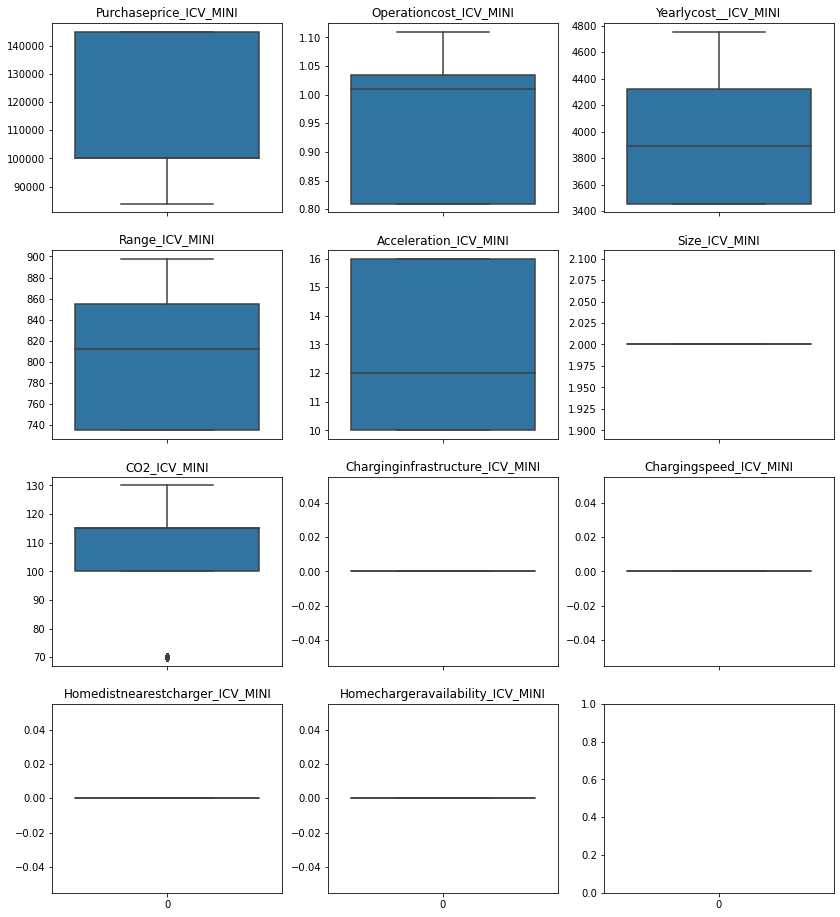

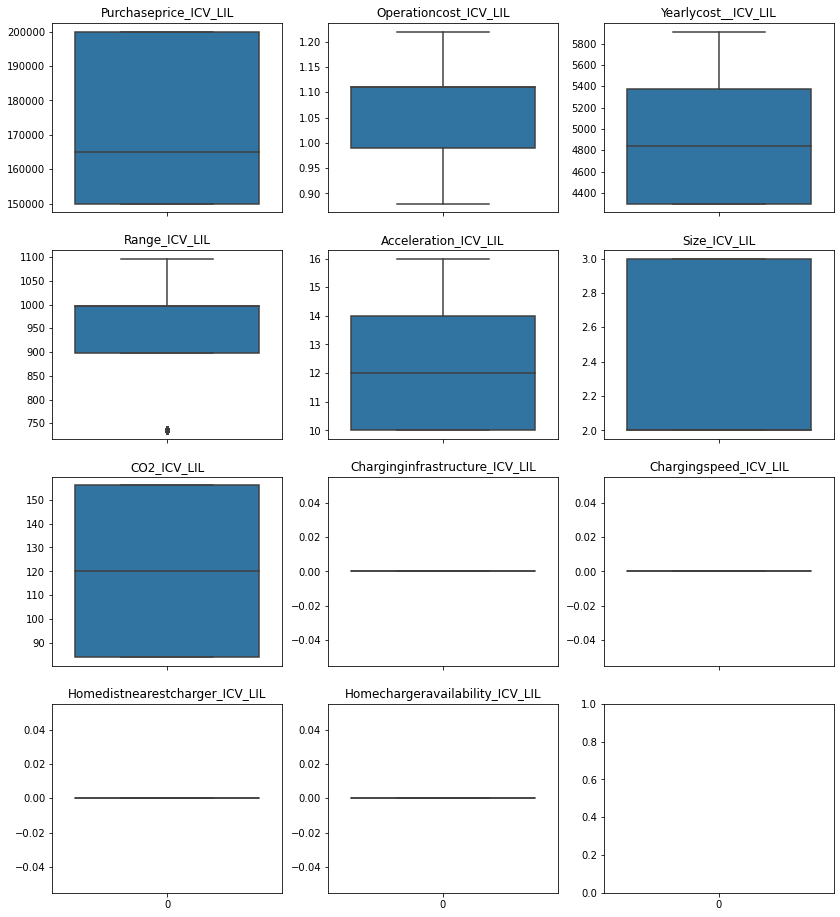

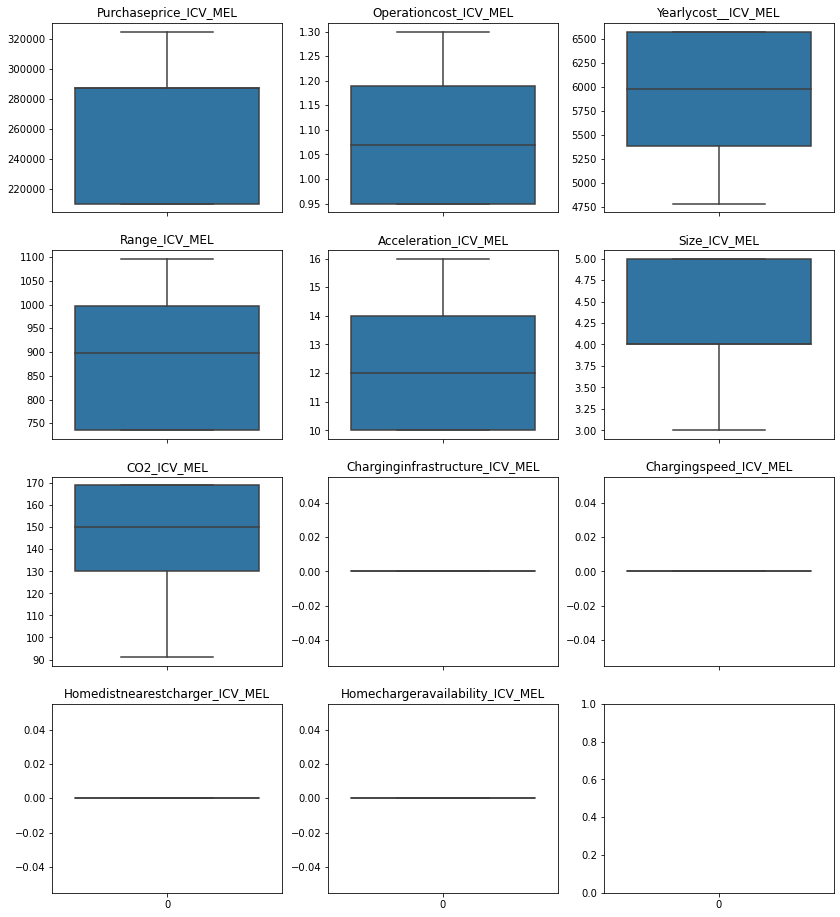

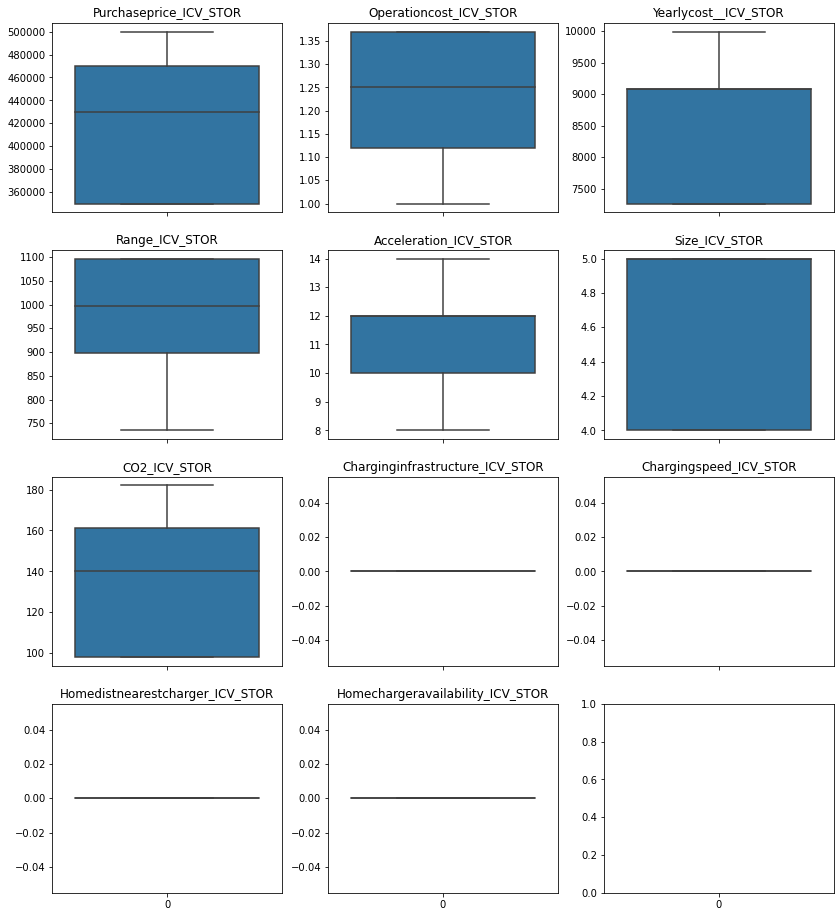

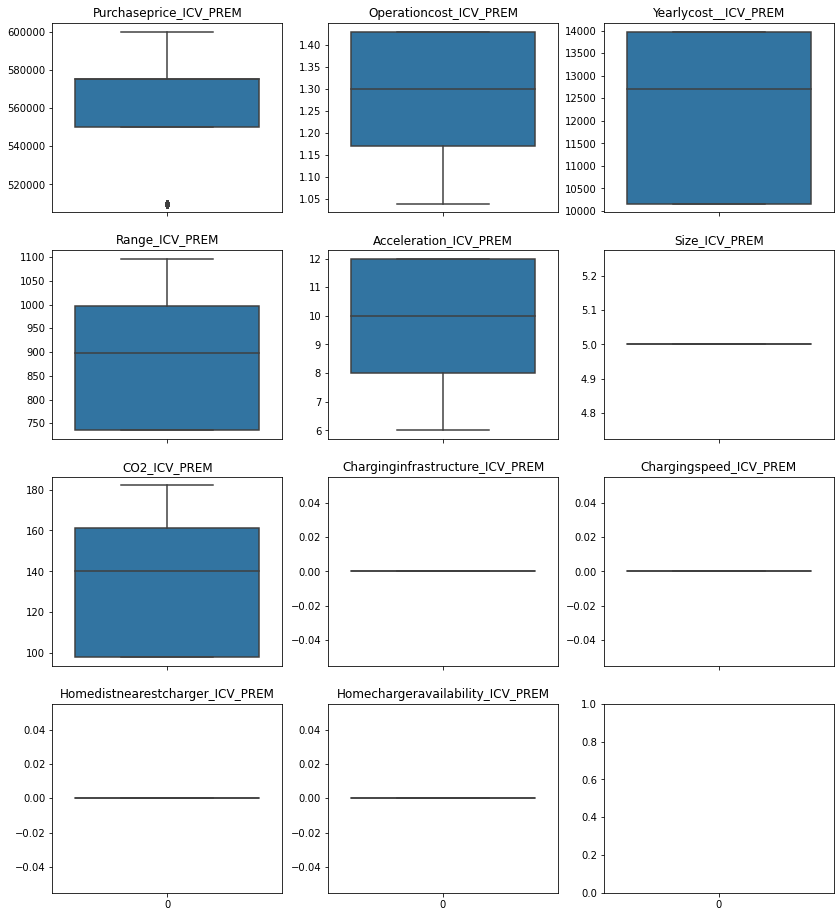

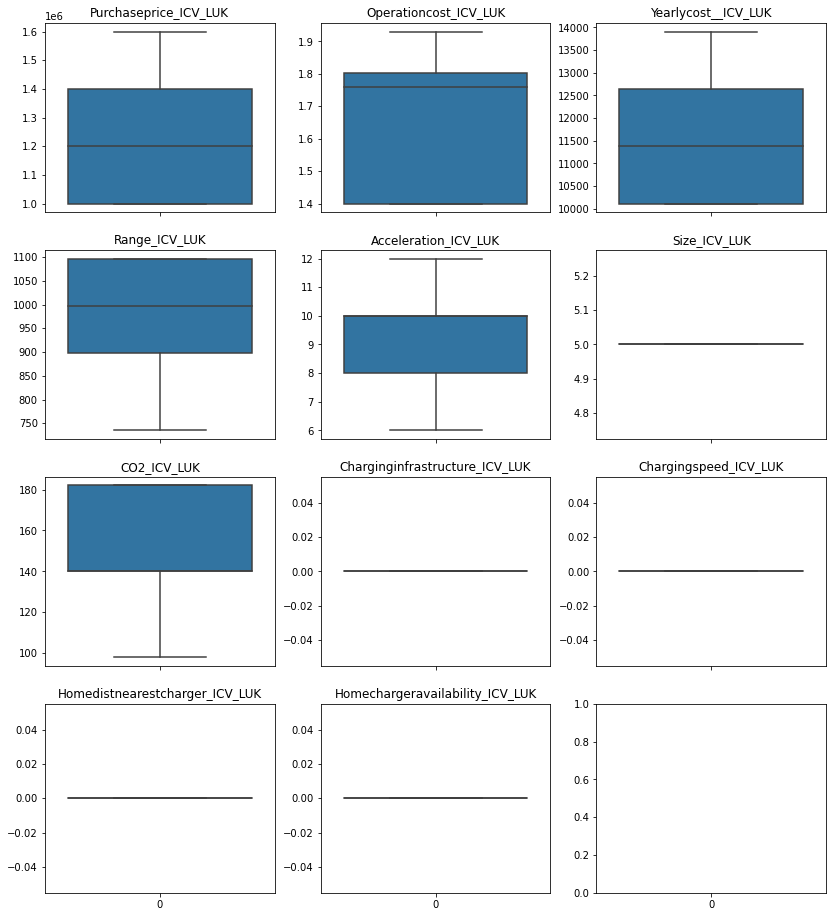

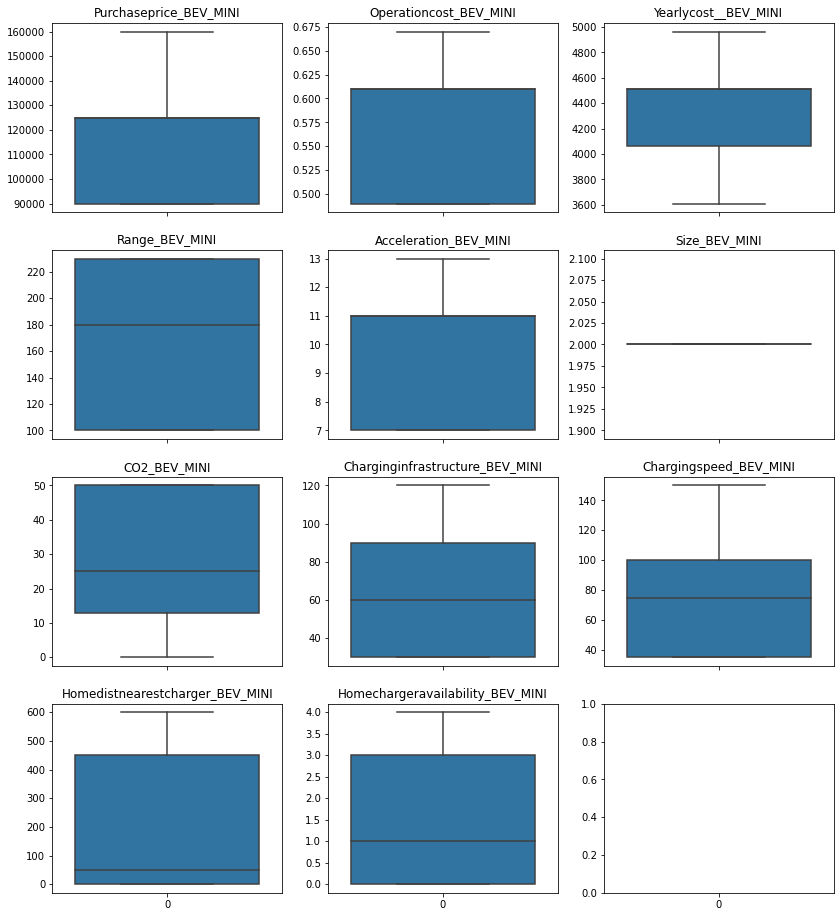

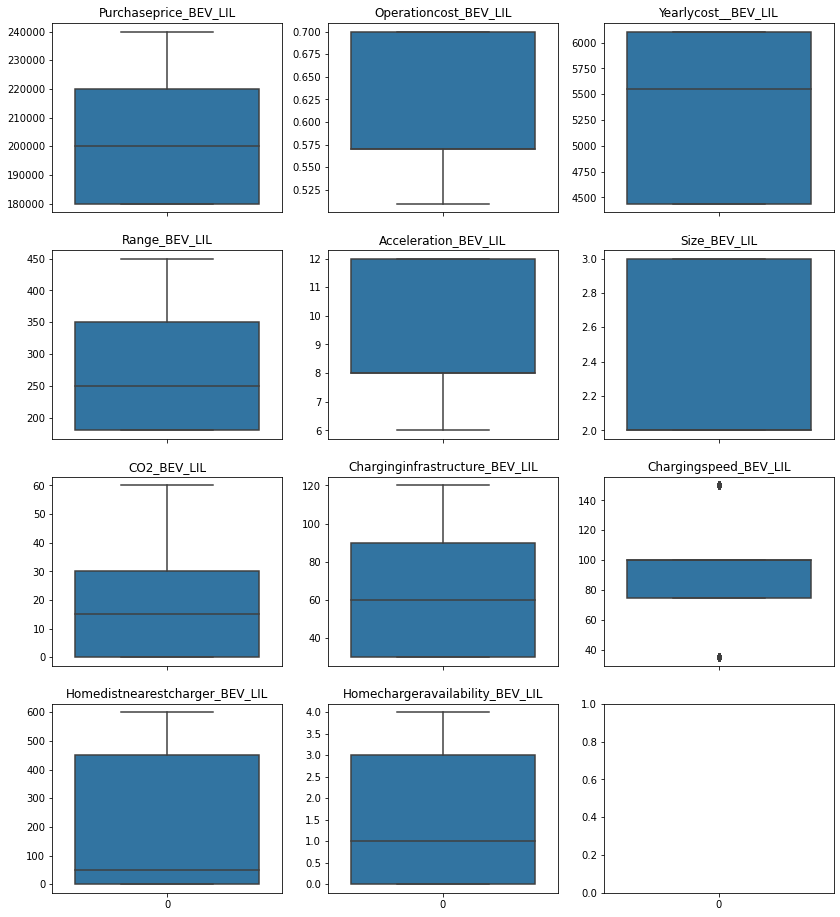

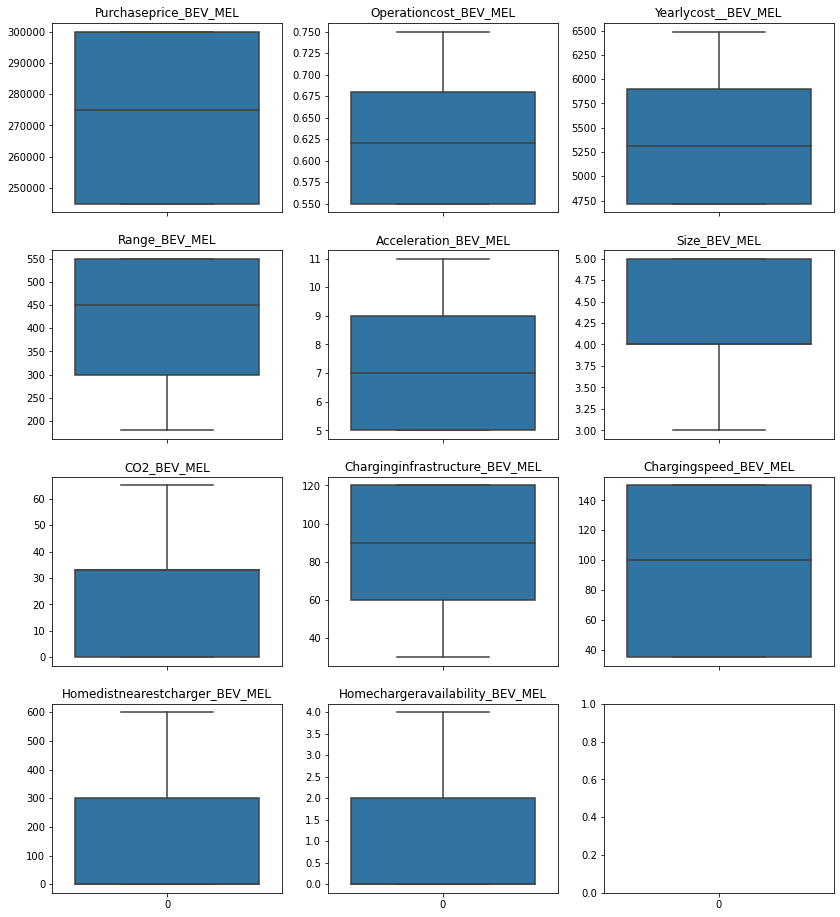

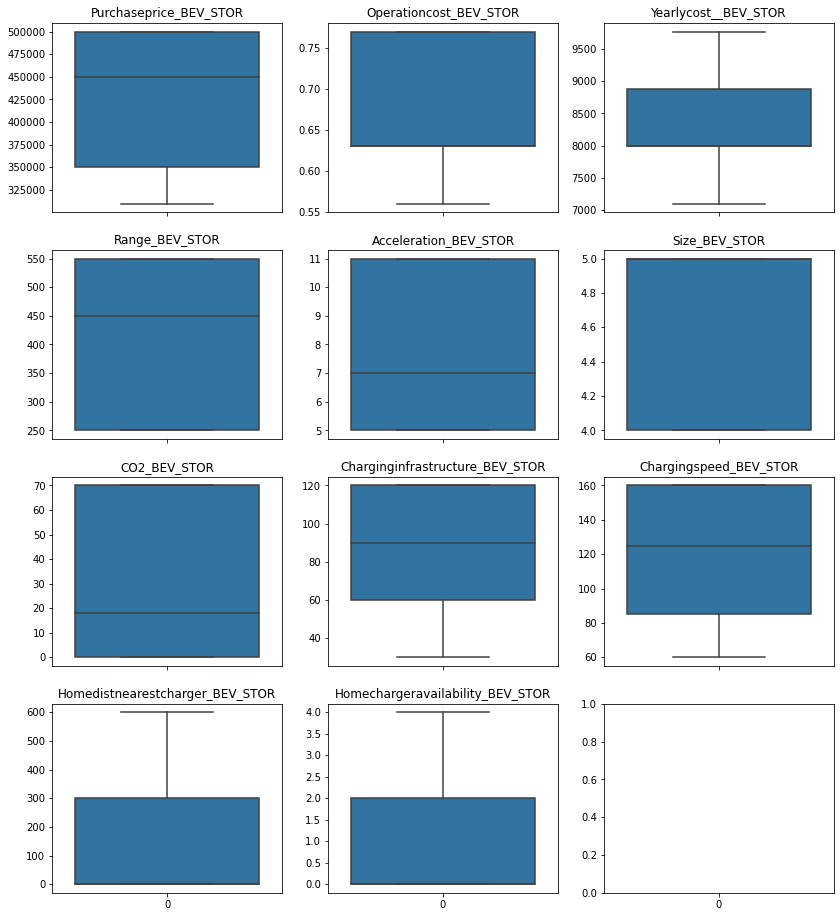

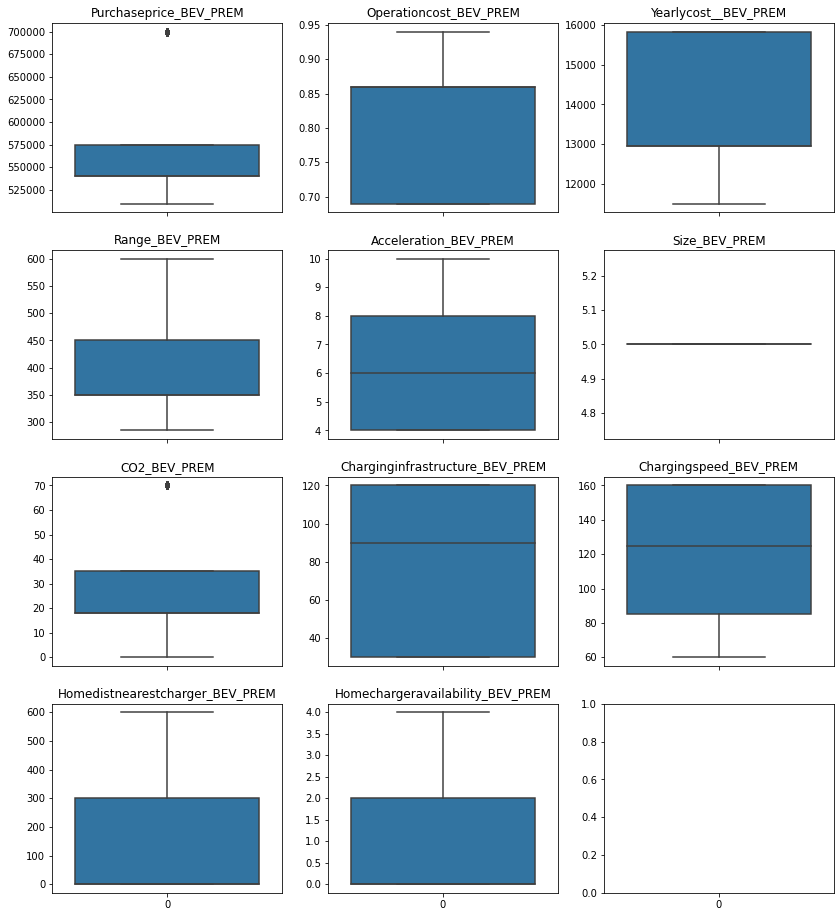

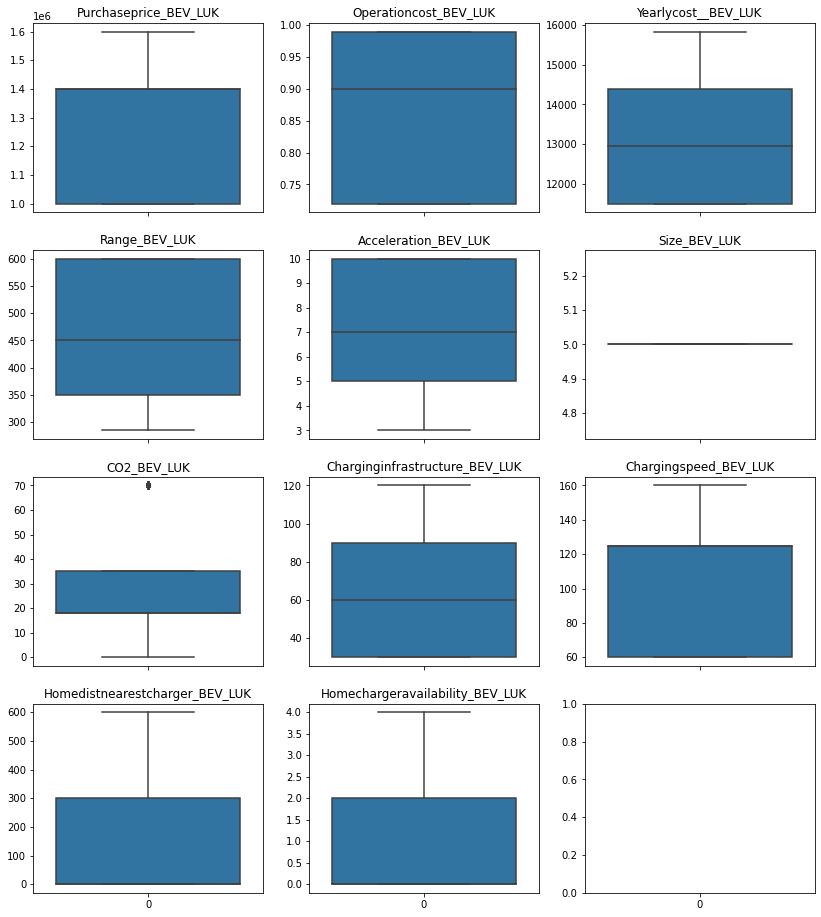

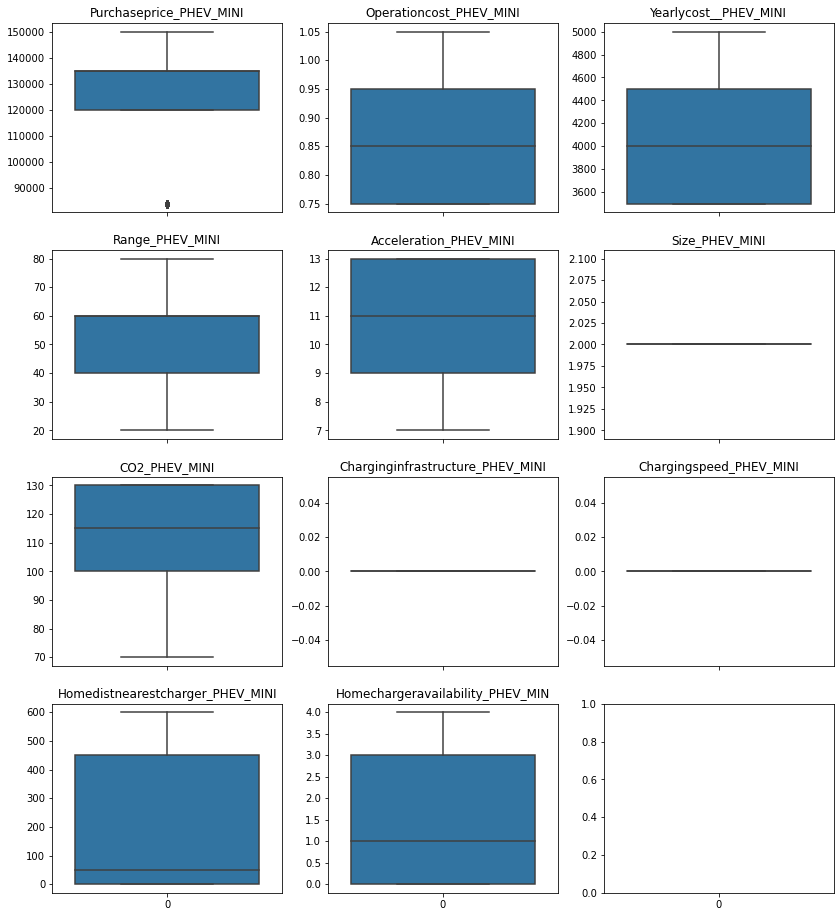

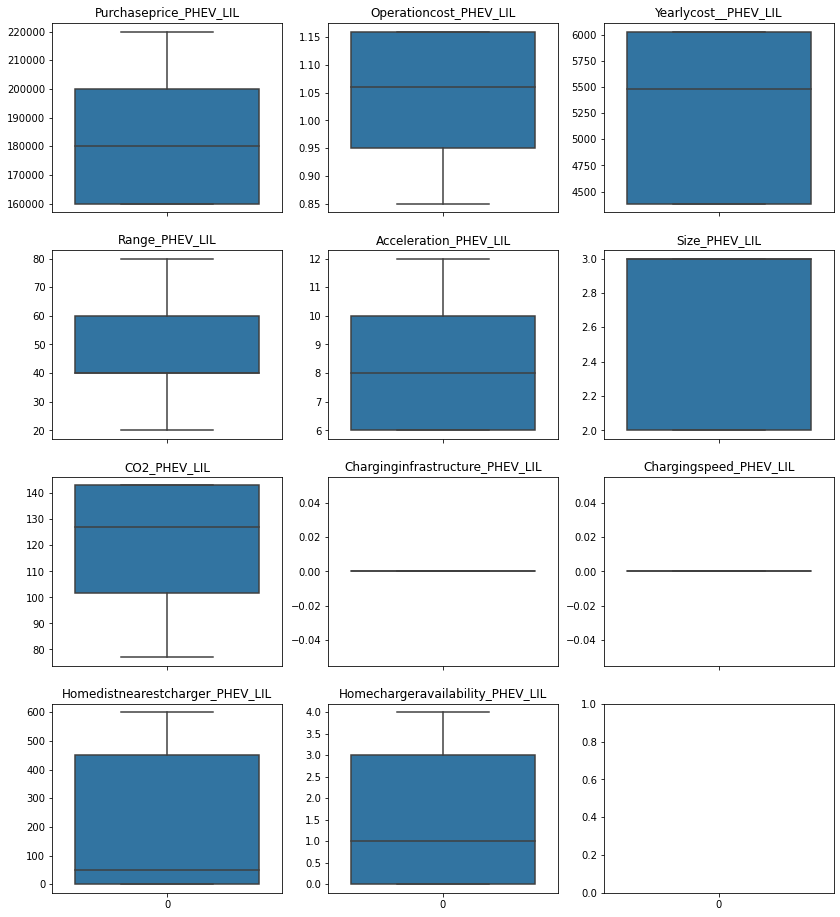

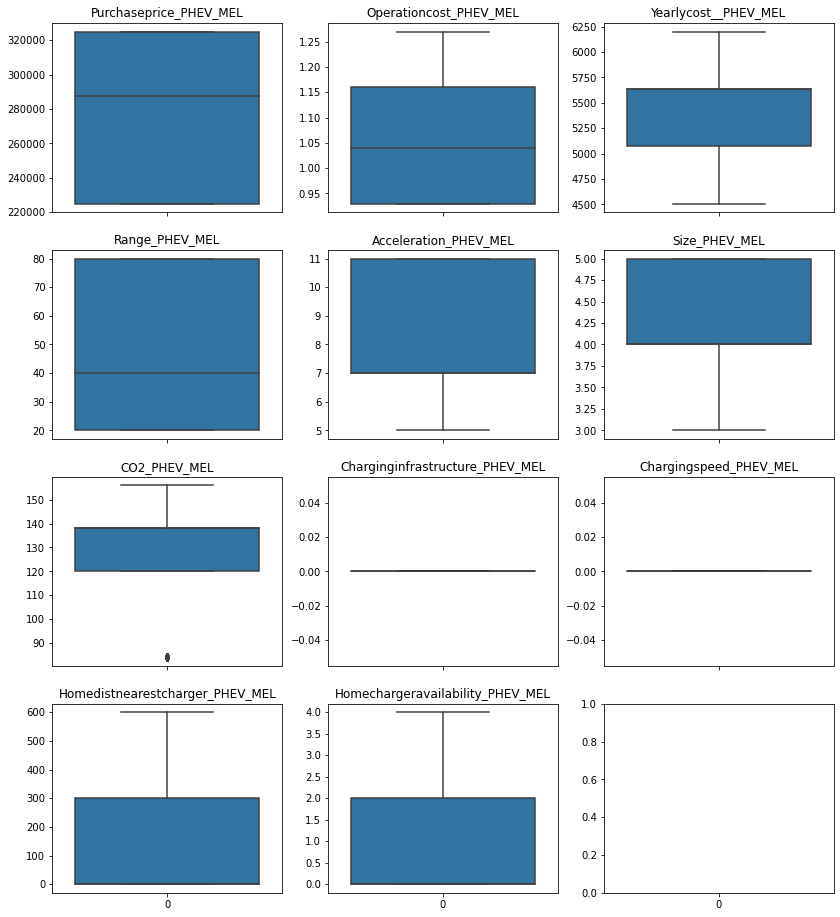

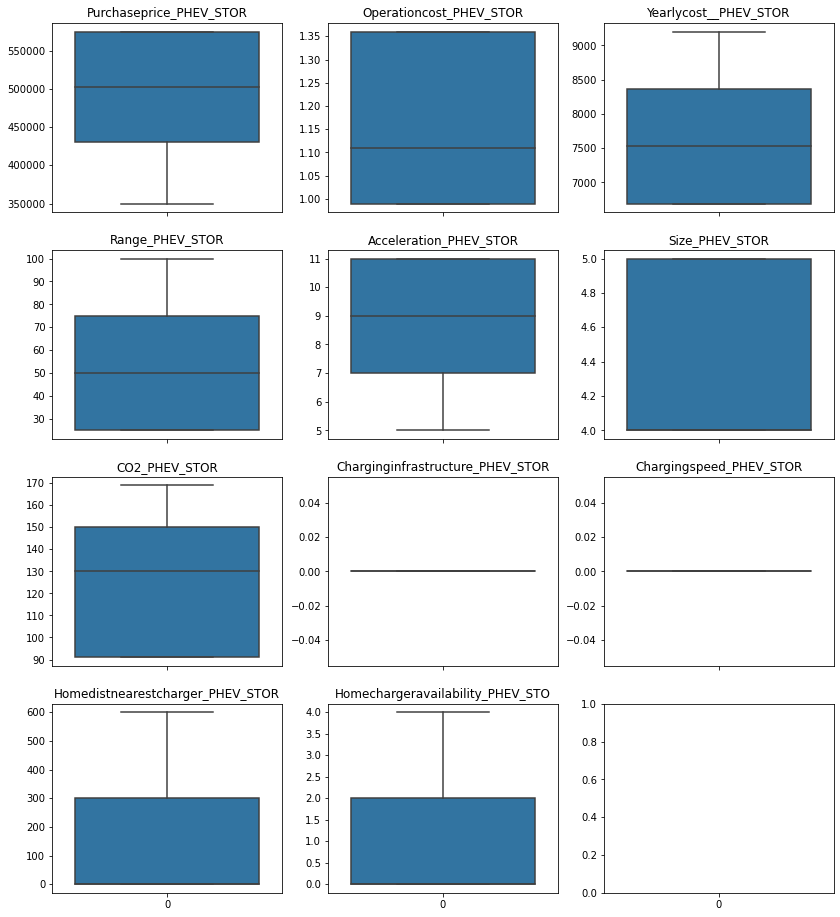

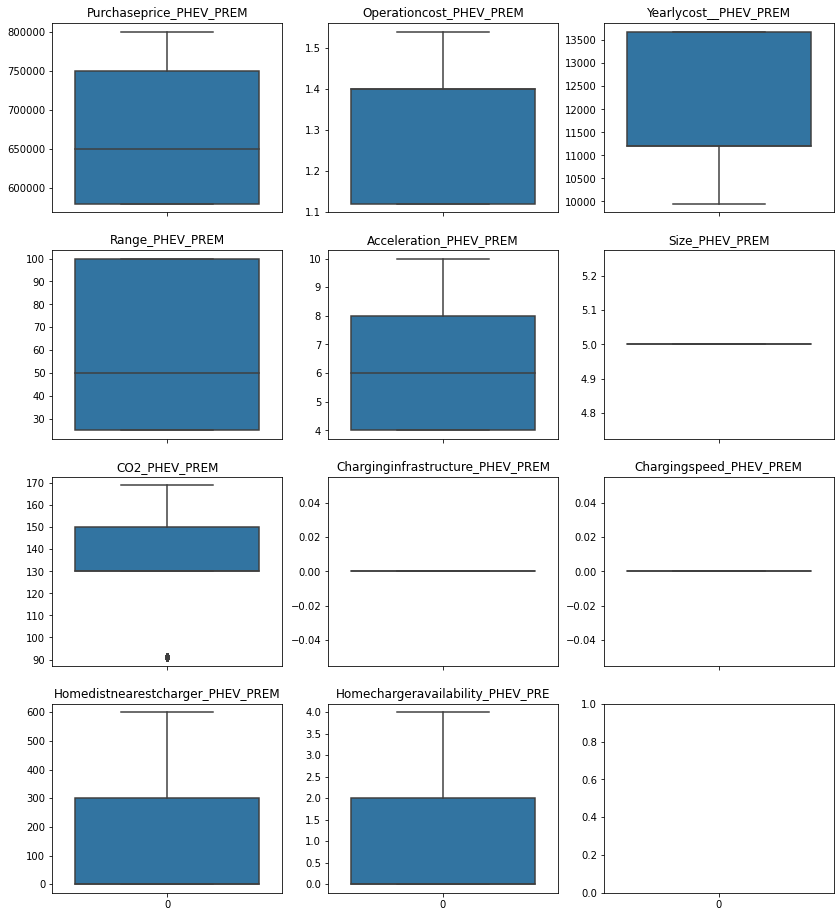

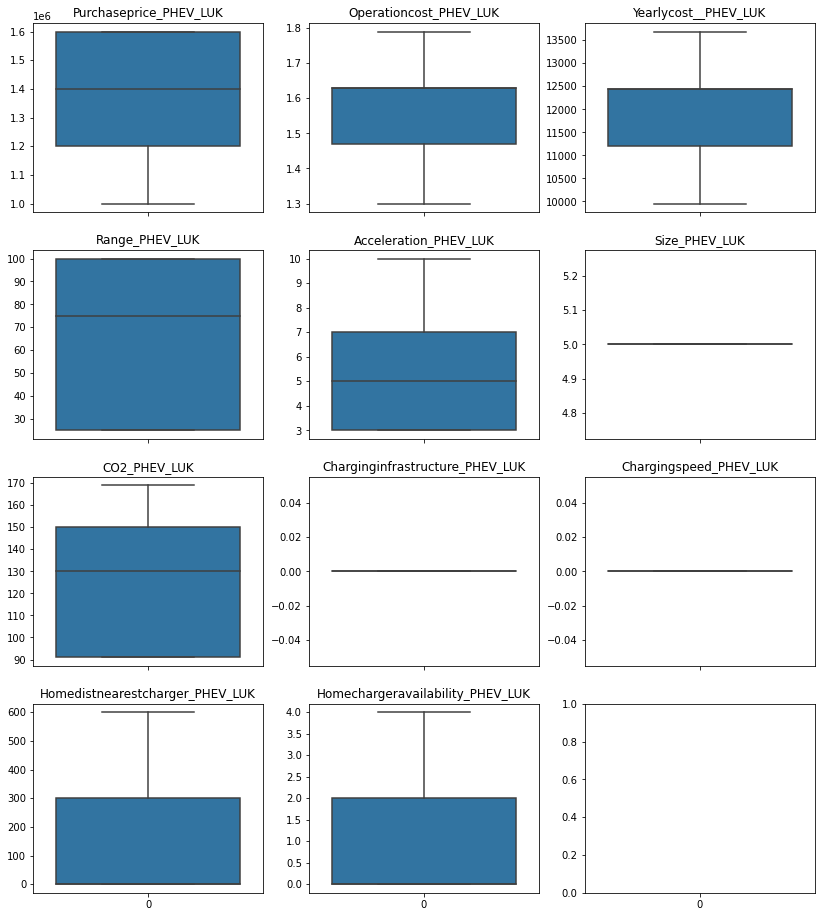

In [59]:
col = df_mod.columns.to_list()
car_type = ["ICV_","BEV_","PHEV_"]
segment = ["MIN","LIL","MEL","STO","PRE","LUK"]

for i,ct in enumerate(car_type):
    for j,s in enumerate(segment):
        counter = 0
        fig, axes = plt.subplots(4, 3, sharex=True, figsize=(14,16))
        X = ct+s
        av = f"AV{i*6+j+1}"
        for c in col:
            if Search(X,c):
                x = counter // 3
                y = counter % 3
                counter += 1
                sns.boxplot(ax=axes[x, y], data=df_mod[df_mod[av] == 1][c].to_list())
                axes[x, y].set_title(c)